Import packages:

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as ms
from sklearn import feature_selection as fs
import sklearn.decomposition as skde
import sklearn.metrics as sklm
from sklearn.linear_model import ElasticNet, Lasso,  Ridge, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
pd.options.display.max_columns = 1000
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from skimpy import skim
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
from scipy.stats import norm
from scipy import stats
from scipy.stats import boxcox
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Import datasets:

In [2]:
dataset = pd.read_csv('train_values_wJZrCmI.csv')

In [3]:
#dataset.head()

In [4]:
dataset_labels = pd.read_csv('train_labels.csv')

In [5]:
#dataset_labels.head()

Data Wrangling - Convert Data Types:

In [6]:
#dataset.dtypes.unique()

In [7]:
dataset1 = dataset.select_dtypes(['object', bool])

In [8]:
le=LabelEncoder()

In [9]:
list1=dataset[list(dataset)]
list_categorical=[]

In [10]:
for i in list1:
    list_categorical.append(i)
for i in list_categorical:
    dataset[i]=le.fit_transform(dataset[i])

In [11]:
dataset.shape

(12600, 59)

Data Wrangling - Drop duplicates:

In [12]:
dataset = dataset.drop_duplicates(keep = 'last')
dataset = dataset.drop_duplicates(subset = 'row_id', keep = 'last')

Data Wrangling - Drop columns with missing values:

In [13]:
dataset.drop('bank_interest_rate', axis = 1, inplace = True)
dataset.drop('mm_interest_rate', axis = 1, inplace = True)
dataset.drop('mfi_interest_rate', axis = 1, inplace = True)
dataset.drop('other_fsp_interest_rate', axis = 1, inplace = True)

Data Wrangling - Replace missing values:

In [14]:
dataset['education_level'].fillna(dataset['education_level'].median(), inplace=True)
dataset['share_hh_income_provided'].fillna(dataset['share_hh_income_provided'].median(), inplace=True)

In [15]:
dataset.dropna(subset=['education_level'], inplace=True)
dataset.dropna(subset=['share_hh_income_provided'], inplace=True)

In [16]:
dataset['education_level'].fillna(4, inplace=True)
dataset['share_hh_income_provided'].fillna(0, inplace=True)

Data Wrangling - Create age groups:

In [17]:
#print(dataset.loc[dataset['education_level'] == 'Unknown'])

In [18]:
dataset.shape

(12600, 55)

In [19]:
dataset2 = dataset[['country','age', 'female', 'married', 'relationship_to_hh_head', 'education_level', 'literacy', 'employed_last_year','employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year', 'num_times_borrowed_last_year', 'formal_savings',
       'informal_savings']]

In [20]:
#dataset2.head()

In [21]:
skim(dataset2)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 12600  │ │ int64       │ 13    │                                    │
│ │ Number of columns │ 17     │ │ int32       │ 4     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃             ┃ missing ┃ complete     ┃ mean  ┃ sd   ┃ p0 ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┃             ┃         ┃ rate         ┃       ┃      ┃    ┃     ┃     ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ country     │       0 │            1 │     3 │    2 │  0 │   1 │   5 │    6 │ ▄▄▄▄▄█ │  │
│ │ age         │       0 │            1 │    21 │   15 │  0 │  10 │  30 │   83 │  █▇▄▂  │  │
│ │ female      │       0 │            1 │  0.56 │  0.5 │  0 │   0 │   1 │    1 │ ▆    █ │  │
│ │ married     │       0 │            1 │  0.65 │ 0.48 │  0 │   0 │   1 │    1 │ ▄    █ │  │
│ │ relationshi │       0 │            1 │   2.9 │  1.9 │  0 │   1 │   5 │    6 │ ▁█  ▃▆ │  │
│ │ p_to_hh_h   │         │              │       │      │    │     │     │      │        │  │
│ │ education_l │       0 │            1 │   1.4 │ 0.97 │  0 │   1 │   2 │    4 │ ▄█ ▇▂  │  │
│ │ evel        │         │              │       │      │    │     │     │      │        │  │
│ │ literacy    │       0 │            1 │  0.61 │ 0.49 │  0 │   0 │   1 │    1 │ ▅    █ │  │
│ │ employed_la │       0 │            1 │  0.59 │ 0.49 │  0 │   0 │   1 │    1 │ ▆    █ │  │
│ │ st_year     │         │              │       │      │    │     │     │      │        │  │
│ │ employment_ │       0 │            1 │  0.64 │ 0.98 │  0 │   0 │   1 │    4 │  █▄ ▁  │  │
│ │ category_   │         │              │       │      │    │     │     │      │        │  │
│ │ employment_ │       0 │            1 │   1.9 │  1.5 │  0 │   1 │   3 │    4 │ ▄█ ▁▃▆ │  │
│ │ type_last   │         │              │       │      │    │     │     │      │        │  │
│ │ share_hh_in │       0 │            1 │     2 │  1.6 │  0 │   1 │   4 │    5 │ ██▃▃█▁ │  │
│ │ come_prov   │         │              │       │      │    │     │     │      │        │  │
│ │ income_frie │       0 │            1 │  0.41 │ 0.49 │  0 │   0 │   1 │    1 │ █    ▆ │  │
│ │ nds_famil   │         │              │       │      │    │     │     │      │        │  │
│ │ income_gove │       0 │            1 │ 0.057 │ 0.23 │  0 │   0 │   0 │    1 │   █    │  │
│ │ rnment_la   │         │              │       │      │    │     │     │      │        │  │
│ │ income_own_ │       0 │            1 │   0.3 │ 0.46 │  0 │   0 │   1 │    1 │ █    ▃ │  │
│ │ business_   │         │              │       │      │    │     │     │      │        │  │
│ │ num_times_b │       0 │            1 │  0.66 │ 0.92 │  0 │   0 │   1 │    3 │ █ ▃ ▂▁ │  │
│ │ orrowed_l   │         │              │       │      │    │     │     │      │        │  │
│ │ formal_savi │       0 │            1 │   0.3 │ 0.46 │  0 │   0 │   1 │    1 │ █    ▃ │  │
│ │ ngs         │         │              │       │      │    │     │     │      │        │  │
│ │ informal_sa │       0 │            1 │  0.17 │ 0.38 │  0 │   0 │   0 │    1 │ █    ▂ │  │
│ │ vings       │         │              │       │      │    │     │     │      │        │  │
│ └─────────────┴─────────┴──────────────┴───────┴──

In [22]:
#dataset2.describe()

In [23]:
#def count_unique(dataset2, cols):
#    for col in cols:
#       print('\n' + 'For column ' + col)
#       print(dataset2[col].value_counts())
#cat_cols = ['country','age','female','married','relationship_to_hh_head',
# 'education_level','literacy','employed_last_year','employment_category_last_year','employment_type_last_year',
# 'share_hh_income_provided','income_friends_family_last_year','income_government_last_year','income_own_business_last_year',
# 'formal_savings','informal_savings','num_times_borrowed_last_year']

#count_unique(dataset2, cat_cols)
#dataset2.shape

In [24]:
#dataset_labels.poverty_probability.value_counts()

Exploratory analysis - Dataset_labels:

Plot variables:

In [25]:
#dataset_labels.info()

Histogram:

<AxesSubplot:>

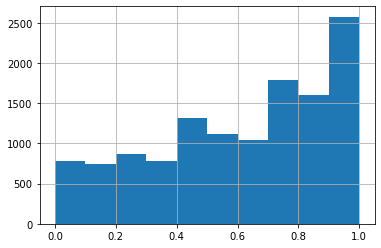

In [26]:
dataset_labels.poverty_probability.hist()

Negatively skewed - HISTOGRAM

Square root:

In [27]:
dataset_labels['poverty_probabilitySQRT']=dataset_labels['poverty_probability']**2

<AxesSubplot:>

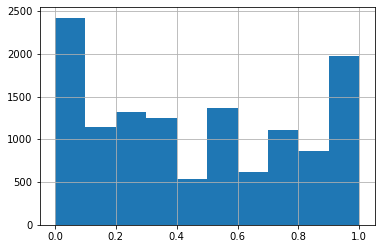

In [28]:
dataset_labels.poverty_probabilitySQRT.hist()

Close to normally distributed - SQRT

Cube:

In [29]:
dataset_labels['poverty_probabilityCUBE'] = dataset_labels['poverty_probability']**3

<AxesSubplot:>

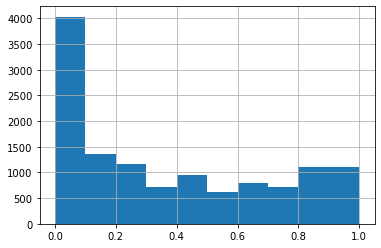

In [30]:
dataset_labels.poverty_probabilityCUBE.hist()

Close to normally distributed - CUBE

Dataset_labels - Logistic Regression:

In [31]:
x = dataset_labels.drop("poverty_probability", axis =1)
y = dataset_labels["poverty_probability"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [33]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.421887
         Iterations 7
                             Results: Logit
Model:                Logit                Pseudo R-squared:  0.327     
Dependent Variable:   poverty_probability  AIC:               10637.5537
Date:                 2022-02-25 11:18     BIC:               10659.8781
No. Observations:     12600                Log-Likelihood:    -5315.8   
Df Model:             2                    LL-Null:           -7900.7   
Df Residuals:         12597                LLR p-value:       0.0000    
Converged:            1.0000               Scale:             1.0000    
No. Iterations:       7.0000                                            
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
row_id                  -0.0001   0.0000 -20.3456 0

A significant predictor of poverty probability that increases/decreases when the liklihood of poverty increases/decreases.

Exploratory analysis - Dataset2:

Plot variables:

In [34]:
#dataset2.info()

<AxesSubplot:>

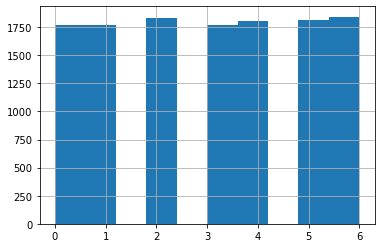

In [35]:
dataset2.country.hist()

<AxesSubplot:>

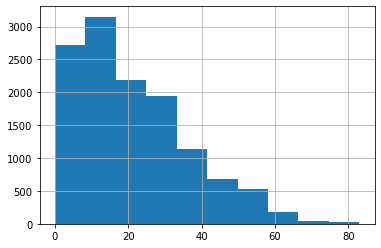

In [36]:
dataset2.age.hist()

<AxesSubplot:>

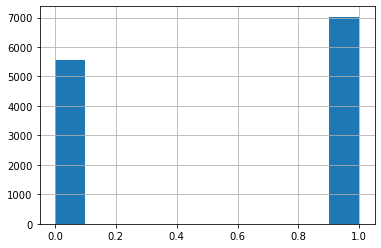

In [37]:
dataset2.female.hist()

<AxesSubplot:>

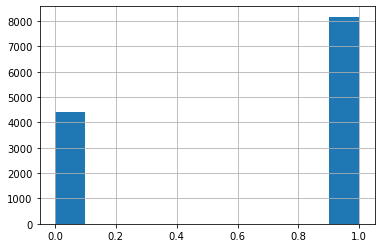

In [38]:
dataset2.married.hist()

<AxesSubplot:>

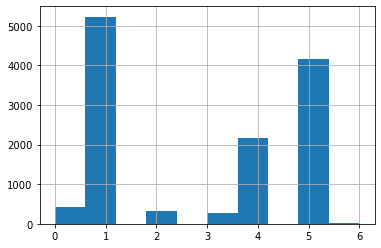

In [39]:
dataset2.relationship_to_hh_head.hist()

<AxesSubplot:>

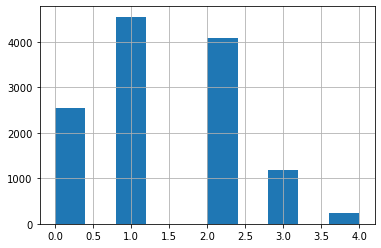

In [40]:
dataset2.education_level.hist()

<AxesSubplot:>

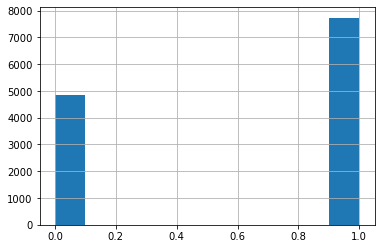

In [41]:
dataset2.literacy.hist()

<AxesSubplot:>

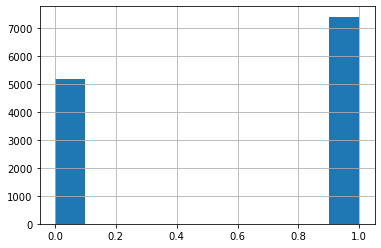

In [42]:
dataset2.employed_last_year.hist()

<AxesSubplot:>

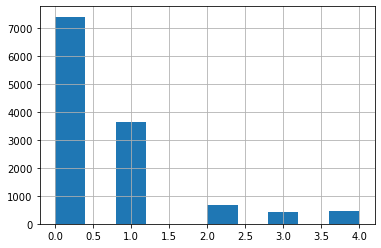

In [43]:
dataset2.employment_category_last_year.hist()

<AxesSubplot:>

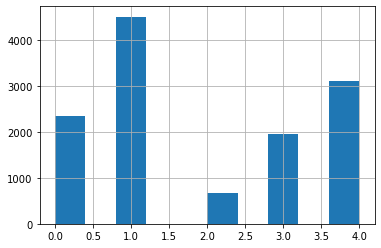

In [44]:
dataset2.employment_type_last_year.hist()

<AxesSubplot:>

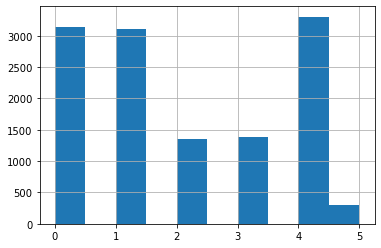

In [45]:
dataset2.share_hh_income_provided.hist()

<AxesSubplot:>

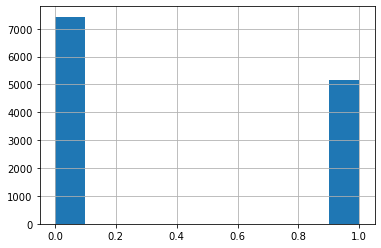

In [46]:
dataset2.income_friends_family_last_year.hist()

<AxesSubplot:>

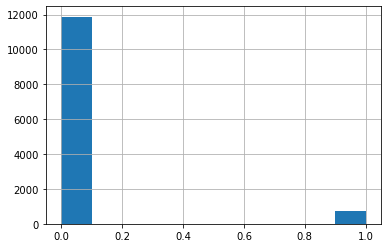

In [47]:
dataset2.income_government_last_year.hist()

<AxesSubplot:>

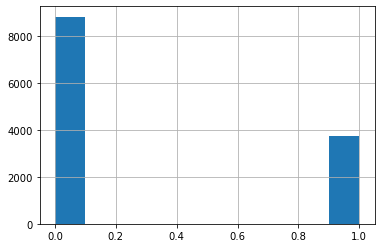

In [48]:
dataset2.income_own_business_last_year.hist()

<AxesSubplot:>

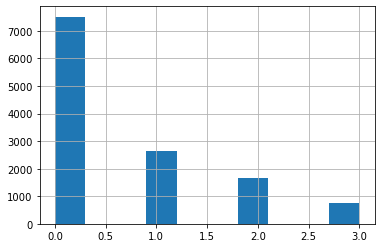

In [49]:
dataset2.num_times_borrowed_last_year.hist()

<AxesSubplot:>

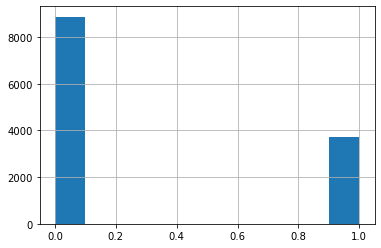

In [50]:
dataset2.formal_savings.hist()

<AxesSubplot:>

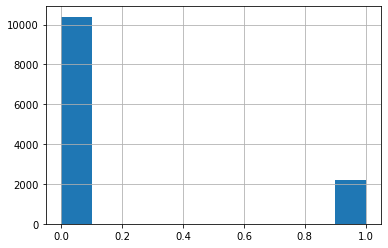

In [51]:
dataset2.informal_savings.hist()

Dataset2 - K-nearest Neighbors:

In [52]:
x = dataset2
y = dataset2['country']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [54]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.22063492063492063 at K = 0


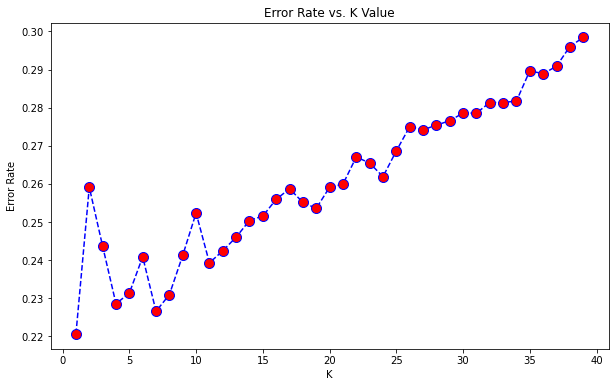

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Error Rate - Lowest point: 21 

In [56]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test, pred))

[[295  57   5   1   0   0   0]
 [ 73 237  33   3   0   0   0]
 [  6  70 258  19   1   0   0]
 [  1   5  94 189  52   9   0]
 [  0   0  11  32 261  51  11]
 [  0   0   0   1  17 328  28]
 [  0   0   0   1   4  70 297]]


True positive:  168 (upper-left)  – Number of positives predicted correctly
True negative:  83  (lower-right) – Number of negatives predicted correctly
False positive: 36  (top-right)   – Number of positives predicted incorrectly
False negative: 50  (lower-left)  – Number of negatives predicted incorrectly

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       358
           1       0.64      0.68      0.66       346
           2       0.64      0.73      0.68       354
           3       0.77      0.54      0.63       350
           4       0.78      0.71      0.74       366
           5       0.72      0.88      0.79       374
           6       0.88      0.80      0.84       372

    accuracy                           0.74      2520
   macro avg       0.75      0.74      0.74      2520
weighted avg       0.75      0.74      0.74      2520



The model is better at predicting for countries 0, 3, and 6 at 81%, 79%, 88%, than countries 1, 2, 4, and 5 at 60%,
68%, 71%, 71%.

Overall, it averages out to 74% accuracy with predicting poverty probability based on numerous variables.

Dataset2 - Decision Tree:

In [58]:
x = dataset2[['age', 'female', 'married', 'relationship_to_hh_head', 'education_level', 'literacy', 'employed_last_year','employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year', 'num_times_borrowed_last_year', 'formal_savings',
       'informal_savings']]
y = dataset2["country"]

In [59]:
#x.head()
#y.head()

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [61]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
treePredictions = decisionTree.predict(x_test)
print (confusion_matrix(y_test, treePredictions))

[[168  53  39  33  32  50  36]
 [ 71 117  47  20  19  38  27]
 [ 40  36 145  38  55  29  47]
 [ 22  22  42 122  41  29  60]
 [ 21  24  57  42 102  10  70]
 [ 29  43  15  35  10 211  24]
 [ 25  27  54  46  82  12 103]]


True positive:  166 (upper-left)  – Number of positives predicted correctly
True negative:  103 (lower-right) – Number of negatives predicted correctly
False positive: 34  (top-right)   – Number of positives predicted incorrectly
False negative: 22  (lower-left)  – Number of negatives predicted incorrectly

In [63]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.45      0.41      0.43       411
           1       0.36      0.35      0.35       339
           2       0.36      0.37      0.37       390
           3       0.36      0.36      0.36       338
           4       0.30      0.31      0.31       326
           5       0.56      0.57      0.57       367
           6       0.28      0.30      0.29       349

    accuracy                           0.38      2520
   macro avg       0.38      0.38      0.38      2520
weighted avg       0.39      0.38      0.38      2520



The model is better at predicting for countries 0 and 5 at 45% and 54%, than countries 1, 2, 3, 4 and 6 at 36%,
36%, 37%, 29%, and 29%.

Overall, it averages out to 38% accuracy with predicting poverty probability based on numerous variables.

Dataset2 - Random Forest:

In [64]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
print(accuracy_score(y_test, forest.predict(x_test)))

0.45357142857142857


In [66]:
print(classification_report(y_test, forest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47       411
           1       0.42      0.39      0.40       339
           2       0.49      0.42      0.45       390
           3       0.42      0.45      0.43       338
           4       0.37      0.44      0.40       326
           5       0.59      0.67      0.63       367
           6       0.36      0.37      0.37       349

    accuracy                           0.45      2520
   macro avg       0.45      0.45      0.45      2520
weighted avg       0.46      0.45      0.45      2520



The model is better at predicting for countries 0 and 5 at 52% and 59%, than countries 1, 2, 3, 4 and 6 at 43%,
48%, 41%, 38%, and 36%.

Overall, it averages out to 45% accuracy with predicting poverty probability based on numerous variables.